## Example Code

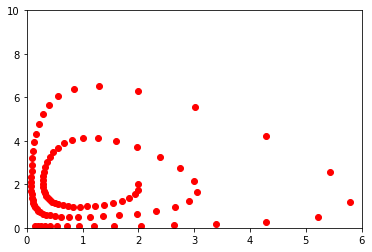

In [8]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

u = [2]
v = [2]
h = .12
for i in range(1,100):
    u_new = u[i-1] + h*u[i-1]*(v[i-1]-2.)
    v_new = v[i-1] + h*v[i-1]*(1.-u[i-1])
    u.append(u_new)
    v.append(v_new)

plt.plot(u,v,'ro')
plt.axis([0,6,0,10])
plt.show()

## Problem 1
$\Delta t = 0.12$, Backward Euler

1. (4,8)
2. (4,2)
3. (6,2)

### Backward Euler

$u^n = u^{n-1} + \Delta t u^{n-1} \{\frac{v^{n-1}}{1-\Delta t (1- u^n)} - 2\}$

$v^n = \frac{v^{n-1}}{1-\Delta t (1-u^n)}$


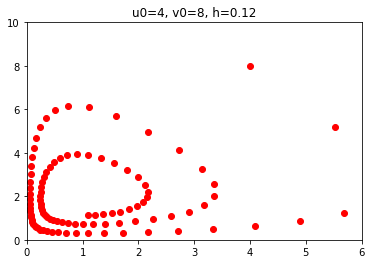

In [13]:
def backwardEuler(u,v,h):
    for i in range(1,100):
    # Reference: https://stackoverflow.com/questions/22742951/solve-an-equation-using-a-python-numerical-solver-in-numpy
        func = lambda tau : tau - u[i-1] - h * u[i-1] * ( (v[i-1] / (1- h * (1-tau))) - 2)

        tau = np.linspace(-10, 10, 201)
        tau_initial_guess = 0.5

        u_new = fsolve(func, tau_initial_guess)

        v_new = v[i-1] / (1 - h * (1 - u_new))

        u.append(u_new)
        v.append(v_new)

    plt.plot(u,v,'ro')
    plt.axis([0,6,0,10])
    plt.title('u0=%s, v0=%s, h=%s' % (u[0], v[0], h))
    plt.show()
    return;


backwardEuler([4],[8],.12)

## Sympletic Euler

$u^{n+1} = u^n + \Delta t u^n(v^{n+1} - 2)$

$v^{n+1} = v^n + \Delta t v^n(1- u^{n})$

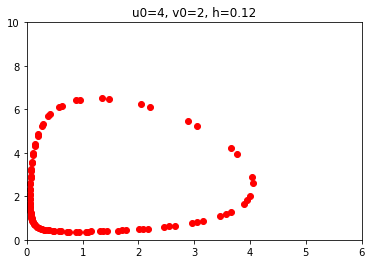

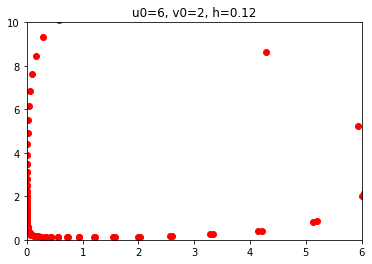

In [10]:
def sympleticEuler(u,v,h):
    for i in range(1,100):
        v_new = v[i-1] + h * v[i-1] * (1.0 -u[i-1])
        u_new = u[i-1] + h * u[i-1] * (v_new - 2)

        u.append(u_new)
        v.append(v_new)

    plt.plot(u,v,'ro')
    plt.axis([0,6,0,10])
    plt.title('u0=%s, v0=%s, h=%s' % (u[0], v[0], h))
    plt.show()
    return;

sympleticEuler([4],[2],.12)
sympleticEuler([6],[2],.12)

## Problem 2
Implement a rigid body simulator for a freely falling object with some initial angular velocity and upward linear velocity. (Please do not use a sphere, so that the effect of rotations is clearly visible.)

* Implemented with MATLAB, please see code at `rotateRB.m`. Simultaion is outputed as `.gif`.

### `rotateRB.m`

```
d = [-1 1];
[x,y,z]= meshgrid(d,d,d);
points = [x(:),y(:),z(:)];

r = points';
r0 = points';

Ibody = 0;
for i = 1:8
    Ibody = Ibody + 1/8 *(r0(:,i)' * r0(:,i) * eye(3) - r0(:,i) * r0(:,i)');
end

Ibodyinv = inv(Ibody);

%% Rigid Body

mass = 1;
v = [0,0,9.8]';
omega = [0.05,0.02,0.01]';

%% function: getTorque.m

function [torque] = getTorque(r,x,F)
torque = 0;
for i =1:8
    torque = torque + cross((r(:,i) - x), F/8);
end

end

%% Initialization
x = [0,0,0]';
F = [0,0,-9.8]' * mass;
q = [0,0,0,1];
q = quatnormalize(q);
P = v * mass;
R = quat2rotm(q);
I = R * Ibody * R';
L = I * omega;

torque = getTorque(r,x,F);

%% Set up display faces

faces = [1 2 6 5;
    1 5 7 3;
    5 6 8 7;
    7 3 4 8;
    4 8 6 2;
    1 3 4 2];

%% Iterate

h = 0.008; % timestep
frame = 0;
while x >= -1
    
    frame = frame + 1;
    
    v = P / mass;
    x = x + v * h;

    q  = q + 1/2 * quatmultiply([0;omega]', q);
    q = quatnormalize(q);

    R = quat2rotm(q);

    P = P + F * h;
    
    I = R * Ibody * R'; % Keeps the same
    
    L = L + torque * h; % torque = 0
    
    omega = inv(I) * L; % Keeps the same
    
    for j = 1:8
        r(:,j) = R * r0(:,j) + x;
    end
    
    torque = getTorque(r,x,F);
    
    newplot
    patch('Faces',faces,'Vertices',r', 'FaceVertexCData',hsv(8),'FaceColor','interp')
    title(sprintf('v = [%.2f,%.2f,%.2f], omega = [%.2f,%.2f,%.2f]', v(1),v(2),v(3),omega(1),omega(2),omega(3)))
    view(3)
    xlim([-4 4])
    ylim([-4 4])
    zlim([-2 8])
    axis vis3d
    alpha(0.3) 
    
    saveas(gcf,sprintf('./png/%04d.png', frame))
    
 end
```